In [2]:
import config_readwrite as crw
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import sys

import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols

import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

In [3]:
CONFIG = "/wynton/home/ahituv/fongsl/EMF/config.ini"

config, cfn = crw.read(CONFIG)

RE = "/wynton/home/ahituv/fongsl/EMF/results/"
RE_DDCT = os.path.join(RE, f"*.ddCTs.tsv")

# go to datapath
os.chdir(RE)

In [4]:
fs = glob.glob(RE_DDCT)

In [5]:
results = {}
for f in fs:
    results[f] = pd.read_csv(f, sep='\t') 
    

In [6]:
df = pd.concat(results.values())
df = df.loc[~df["primers"].isna()]
df.head()

,Well Position,CT,plate,primers,sample_name,rep,Experiment,Control_mean,dCT,Control_dCT_mean,ddCT,fold_change,control_gene,date
0,B1,14.908525,plate1.xls,GAPDH,Control 30' exp1,1.0,1.0,26.109299,-11.200775,-11.398504,0.197730,0.871921,ACTB,20240123
1,B2,14.369675,plate1.xls,GAPDH,Control 30' exp1,2.0,1.0,26.109299,-11.739624,-11.398504,-0.341120,1.266740,ACTB,20240123
2,B3,15.763824,plate1.xls,GAPDH,Control 30' exp1,3.0,1.0,26.109299,-10.345476,-11.398504,1.053029,0.481955,ACTB,20240123
3,B4,13.756628,plate1.xls,GAPDH,PEMF 60' exp1,1.0,1.0,26.447333,-12.690705,-11.398504,-1.292200,2.449012,ACTB,20240123
4,B5,15.132206,plate1.xls,GAPDH,PEMF 60' exp1,2.0,1.0,26.447333,-11.315127,-11.398504,0.083378,0.943845,ACTB,20240123


In [26]:
# reformat some names

# 20231115
df.loc[(df["date"]==20231115)&
      (df["primers"] == "IL6"), "primer"] = "IL6-original "

df.loc[(df["date"]==20231115)&
      (df["sample_name"] == "PEMF-physiostim 60'"), "sample_name"] = "PEMF 60' exp1"

df.loc[(df["date"]==20231115)&
      (df["sample_name"] == "PEMF-physiostim 30'"), "sample_name"] = "PEMF 30' exp1"

df.loc[(df["date"]==20231115)&
      (df["sample_name"] == "Control"), "sample_name"] = "Control 30' exp1"

# 20231212
df.loc[(df["date"]==20231212)&
      (df["primers"] == "IL6"), "primers"]="IL6-2"

df.loc[(df["date"]==20231212)&
      (df["sample_name"] == "PEMF-physiostim"), "sample_name"] = "PEMF 60' exp2"

df.loc[(df["date"]==20231212)&
      (df["sample_name"] == "Control"), "sample_name"] = "Control 60' exp2"

#20231222
df.loc[(df["date"]==20231222)&
      (df["sample_name"] == "PEMF-physiostim"), "primers"]="PEMF 60' exp2"

df.loc[(df["date"]==20231222)&
      (df["sample_name"] == "Control"), "sample_name"] = "Control 60' exp2"

In [27]:
il6genes = ['IL6',
            'IL6-1',
            'IL6-2',
            'IL6-original ']

il6 = df.loc[df["primers"].isin(il6genes)].copy()

il6.head()

il6[["sample_name", "date"]].drop_duplicates().sort_values(by='sample_name')

,sample_name,date
18,Control 30' exp1,20240123
96,Control 30' exp1,20231115
109,Control 60' exp2,20240123
108,Control 60' exp2,20231222
12,Control 60' exp2,20231212
108,PEMF 30' exp1,20231115
21,PEMF 60' exp1,20240123
120,PEMF 60' exp1,20231115
90,PEMF 60' exp2,20240123
15,PEMF 60' exp2,20231212


In [29]:
il6.head()

,Well Position,CT,plate,primers,sample_name,rep,Experiment,Control_mean,dCT,Control_dCT_mean,ddCT,fold_change,control_gene,date,primer
18,E1,28.364365,plate1.xls,IL6-original,Control 30' exp1,1.0,1.0,26.109299,2.255065,2.433622,-0.178556,1.131751,ACTB,20240123,NaN
19,E2,27.789349,plate1.xls,IL6-original,Control 30' exp1,2.0,1.0,26.109299,1.680049,2.433622,-0.753572,1.685962,ACTB,20240123,NaN
20,E3,28.858532,plate1.xls,IL6-original,Control 30' exp1,3.0,1.0,26.109299,2.749233,2.433622,0.315611,0.803510,ACTB,20240123,NaN
21,E4,29.004190,plate1.xls,IL6-original,PEMF 60' exp1,1.0,1.0,26.447333,2.556858,2.433622,0.123236,0.918126,ACTB,20240123,NaN
22,E5,29.830538,plate1.xls,IL6-original,PEMF 60' exp1,2.0,1.0,26.447333,3.383205,2.433622,0.949584,0.517782,ACTB,20240123,NaN


In [30]:
x="primer"
y="fold_change"
hue='sample_name'
data = il6.loc[il6["control_gene"]=="ACTB"].copy()

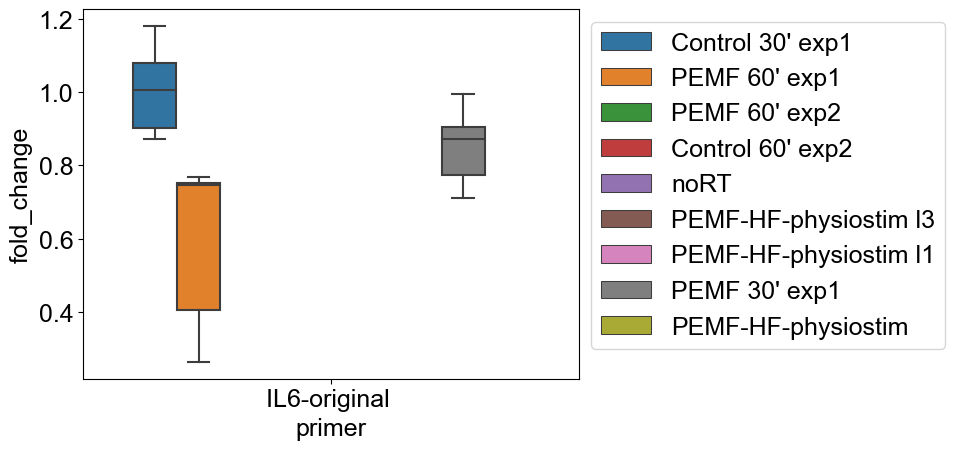

In [32]:
sns.boxplot(x=x, y=y, data=data, hue=hue)
plt.legend(bbox_to_anchor=(1,1))